# GAMA-12 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
44f1ae0 (Thu Nov 30 18:27:54 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, quick_checks

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
#SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
SUFFIX = "_20171018"

master_catalogue = Table.read("{}/master_catalogue_gama-12{}.fits".format(OUT_DIR, SUFFIX))

## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(224, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(224, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

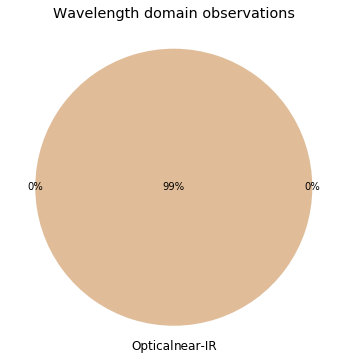

In [6]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

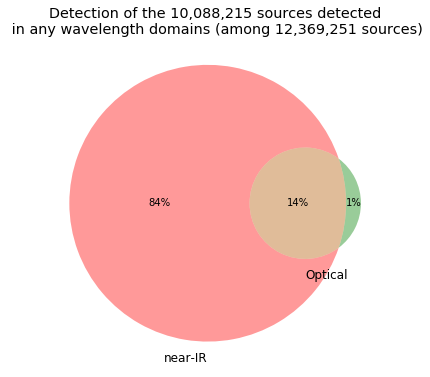

In [7]:
venn2(
    [
        np.sum(flag_det[flag_obs == 3] == 1),
        np.sum(flag_det[flag_obs == 3] == 2),
        np.sum(flag_det[flag_obs == 3] == 3)
    ],
    set_labels=('near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = [           "KIDS u"]
g_bands = ["DECam g", "KIDS g", "SUPRIME g", "GPC1 g"]
r_bands = ["DECam r", "KIDS r", "SUPRIME r", "GPC1 r"]
i_bands = ["DECam i", "KIDS i", "SUPRIME i", "GPC1 i"]
z_bands = ["DECam z",           "SUPRIME z", "GPC1 z"]
y_bands = ["DECam y",           "SUPRIME y", "GPC1 y"]

In [9]:
for band in g_bands:
    print(band, 'max:', np.nanmax(master_catalogue["m_{}".format(band.replace(" ", "_").lower())]))

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:355: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)


DECam g max: nan
KIDS g max: 43.5271
SUPRIME g max: nan
GPC1 g max: 28.9741001129


The Suprime g magnitudes are very wrong. They are almost all between 0 and 1.

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

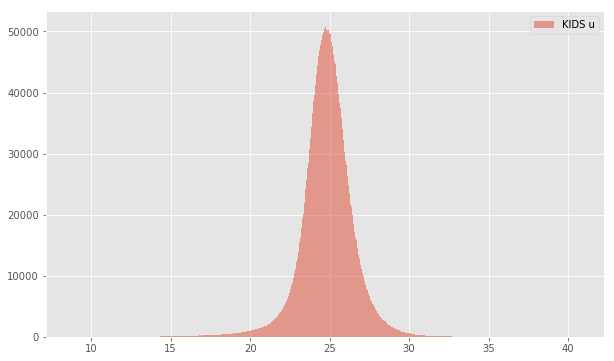

HELP warning: the column m_decam_g (DECam g) is empty.
HELP warning: the column m_suprime_g (SUPRIME g) is empty.


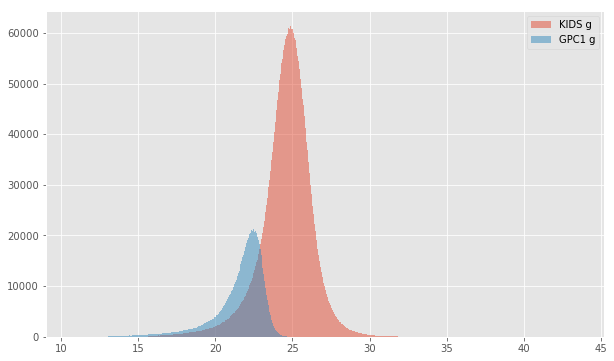

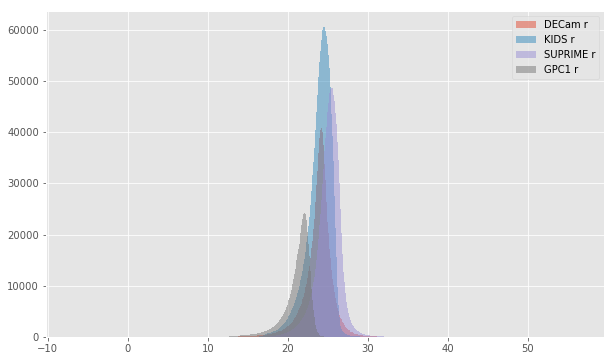

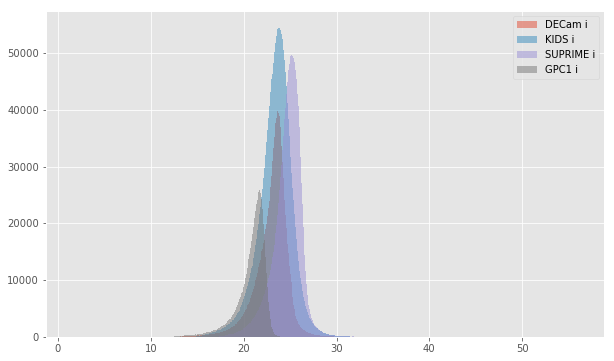

HELP warning: the column m_decam_z (DECam z) is empty.


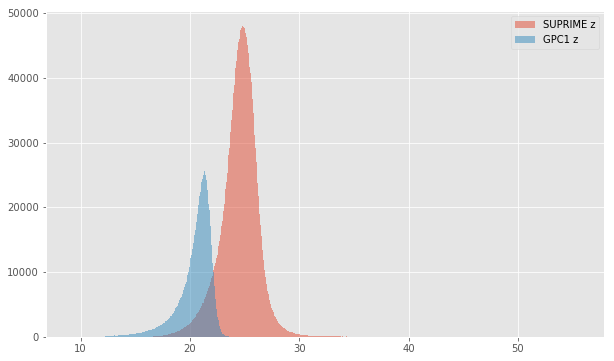

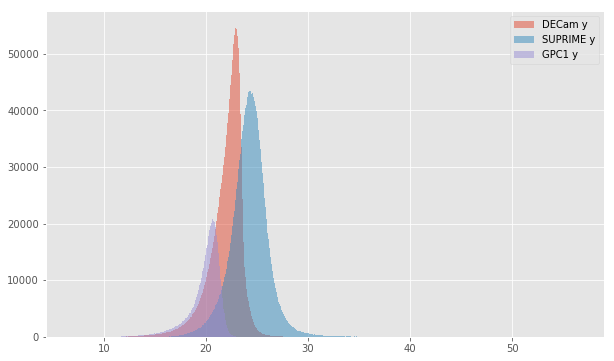

In [10]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

No sources have both DECam g (aperture) and KIDS g (aperture) values.
No sources have both DECam g (total) and KIDS g (total) values.
No sources have both DECam g (aperture) and SUPRIME g (aperture) values.
No sources have both DECam g (total) and SUPRIME g (total) values.
No sources have both DECam g (aperture) and GPC1 g (aperture) values.
No sources have both DECam g (total) and GPC1 g (total) values.
SUPRIME g (aperture) - KIDS g (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.17
- 1% percentile: -1.7694091796874998
- 99% percentile: 1.1416382789611785


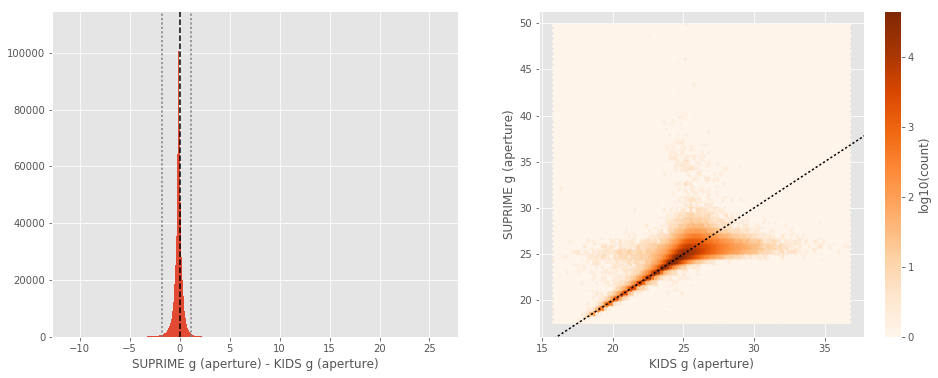

No sources have both KIDS g (total) and SUPRIME g (total) values.
GPC1 g (aperture) - KIDS g (aperture):
- Median: -0.33
- Median Absolute Deviation: 0.33
- 1% percentile: -2.075102996826172
- 99% percentile: 2.269778823852544


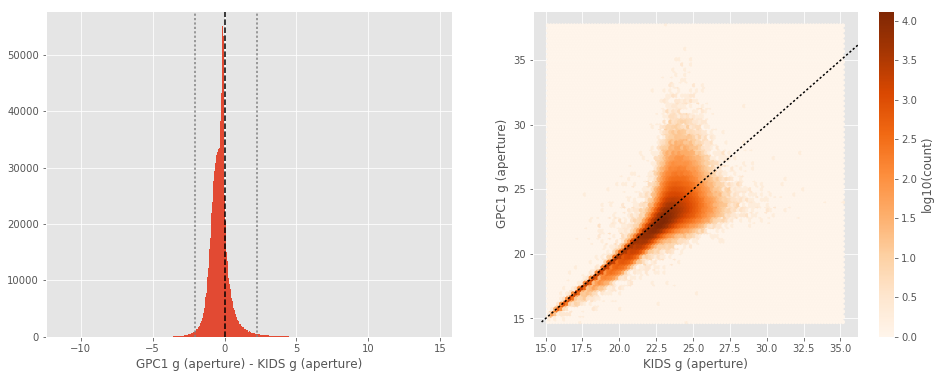

GPC1 g (total) - KIDS g (total):
- Median: -0.09
- Median Absolute Deviation: 0.16
- 1% percentile: -1.5102294158935545
- 99% percentile: 0.7436729240417477


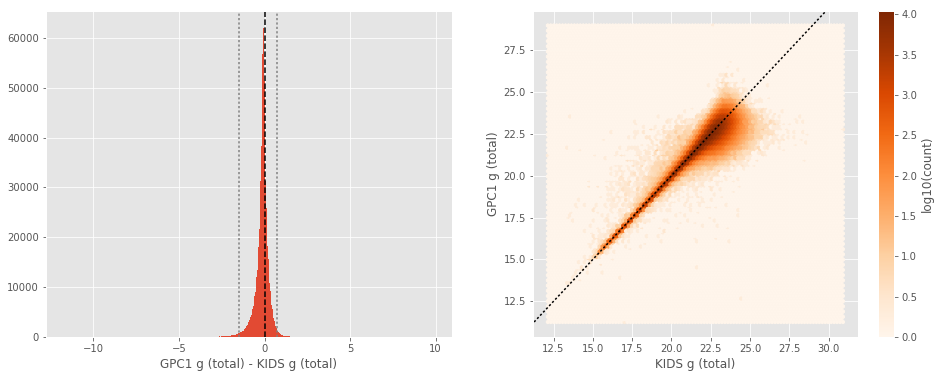

GPC1 g (aperture) - SUPRIME g (aperture):
- Median: -0.25
- Median Absolute Deviation: 0.35
- 1% percentile: -2.14129150390625
- 99% percentile: 2.4541178894042948


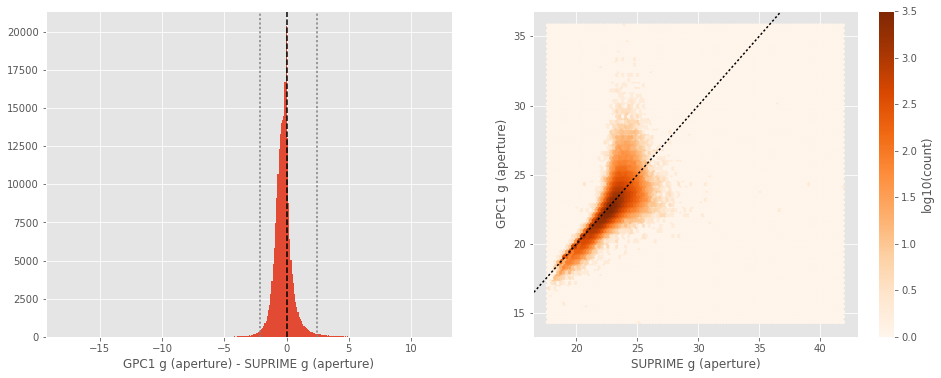

No sources have both SUPRIME g (total) and GPC1 g (total) values.
KIDS r (aperture) - DECam r (aperture):
- Median: -0.57
- Median Absolute Deviation: 0.42
- 1% percentile: -3.5359573364257812
- 99% percentile: 0.734039306640625


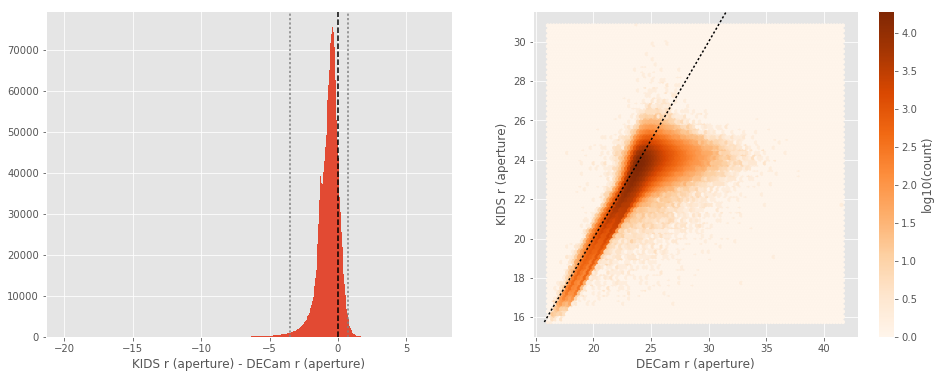

KIDS r (total) - DECam r (total):
- Median: -0.69
- Median Absolute Deviation: 0.43
- 1% percentile: -3.254582099914551
- 99% percentile: 0.992661209106446


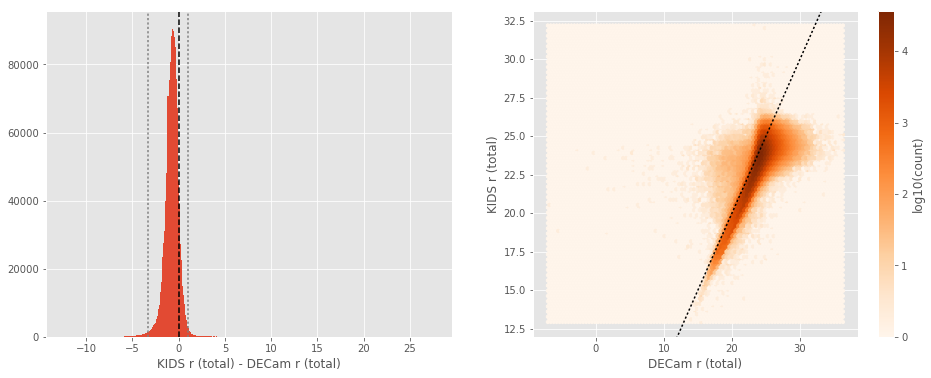

SUPRIME r (aperture) - DECam r (aperture):
- Median: -0.61
- Median Absolute Deviation: 0.41
- 1% percentile: -3.591978073120117
- 99% percentile: 0.9319587707519483


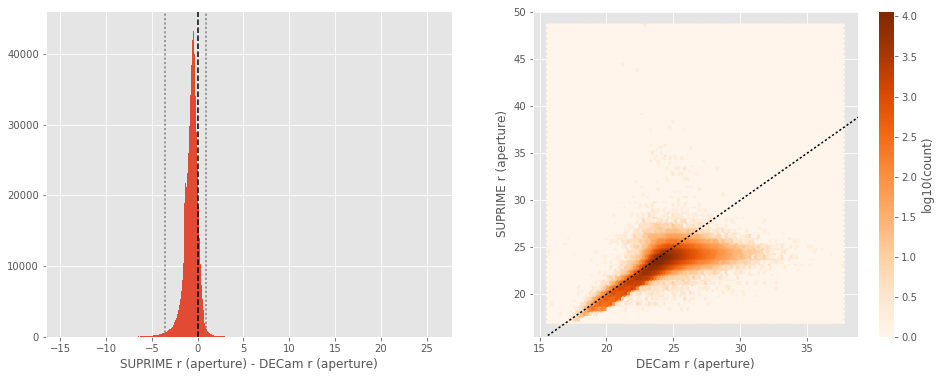

SUPRIME r (total) - DECam r (total):
- Median: -0.84
- Median Absolute Deviation: 0.41
- 1% percentile: -3.550533676147461
- 99% percentile: 1.0033042907714531


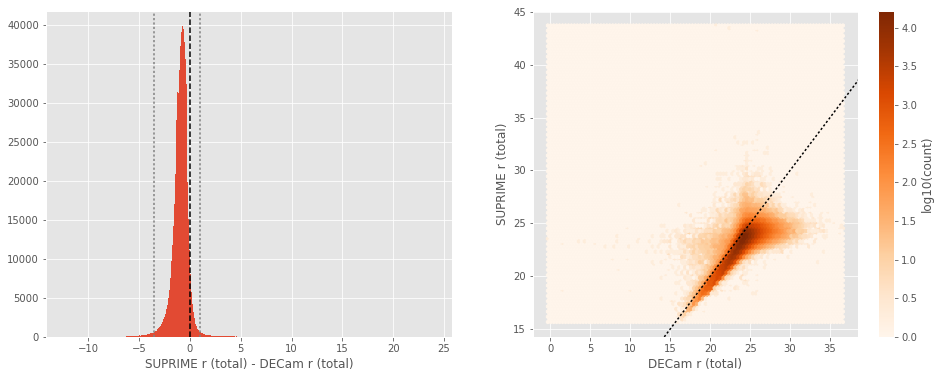

GPC1 r (aperture) - DECam r (aperture):
- Median: -1.00
- Median Absolute Deviation: 0.37
- 1% percentile: -3.2967313289642335
- 99% percentile: 0.7026295661926285


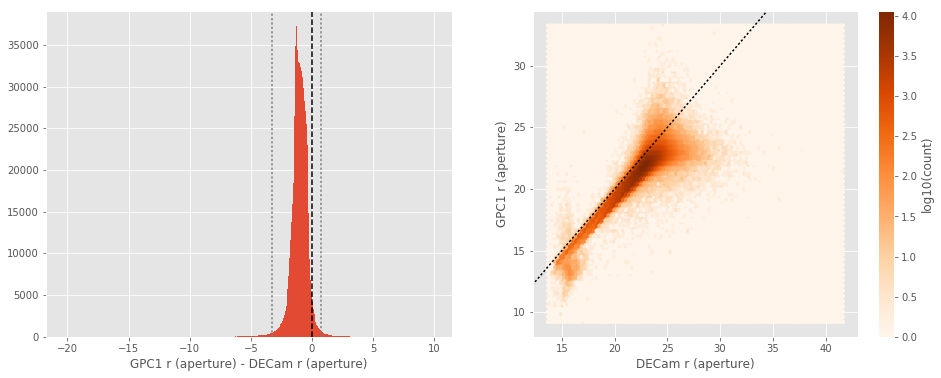

GPC1 r (total) - DECam r (total):
- Median: -0.86
- Median Absolute Deviation: 0.37
- 1% percentile: -2.5506317138671877
- 99% percentile: 0.4100577354431221


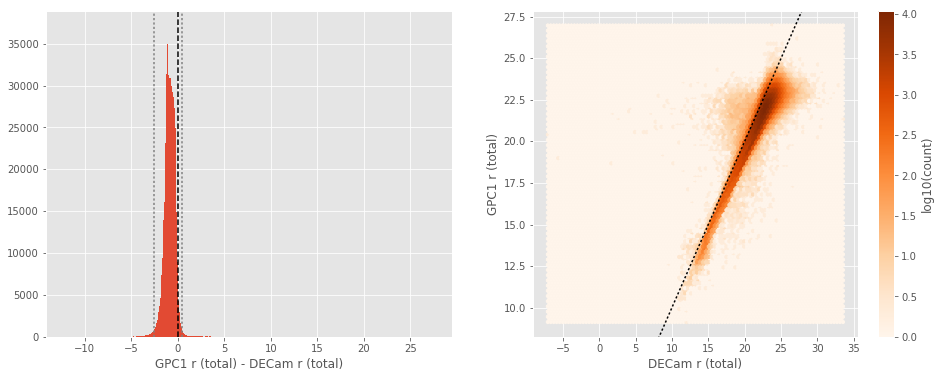

SUPRIME r (aperture) - KIDS r (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8898246765136719
- 99% percentile: 0.9822139739990225


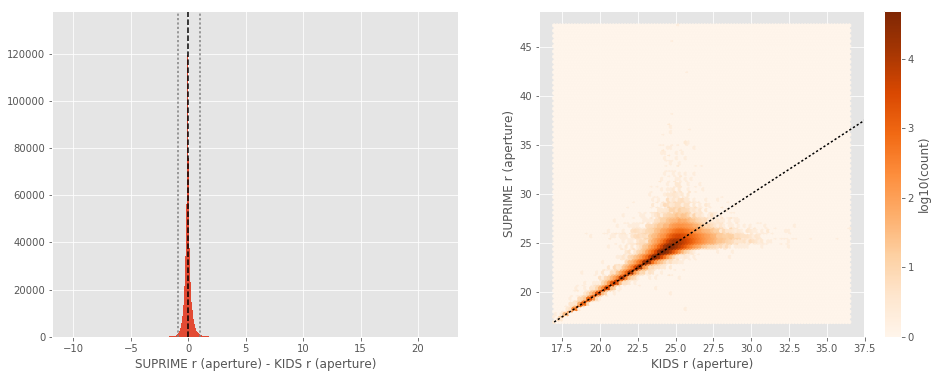

SUPRIME r (total) - KIDS r (total):
- Median: -0.21
- Median Absolute Deviation: 0.19
- 1% percentile: -1.4218847274780273
- 99% percentile: 1.2361030578613281


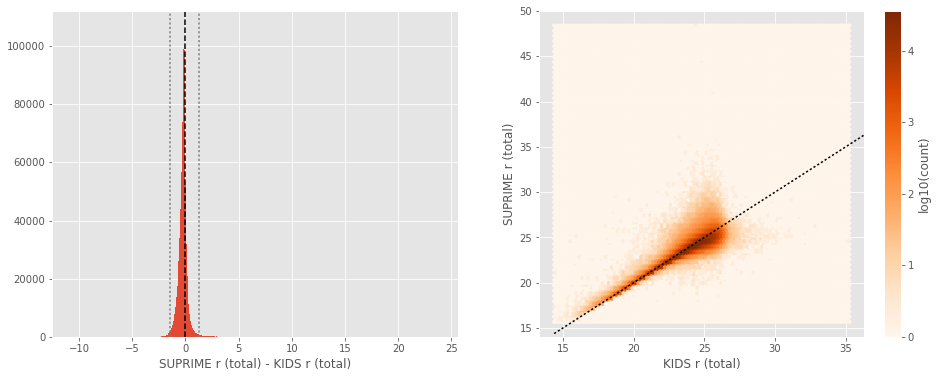

GPC1 r (aperture) - KIDS r (aperture):
- Median: -0.18
- Median Absolute Deviation: 0.23
- 1% percentile: -1.1846766662597656
- 99% percentile: 1.5284150695800705


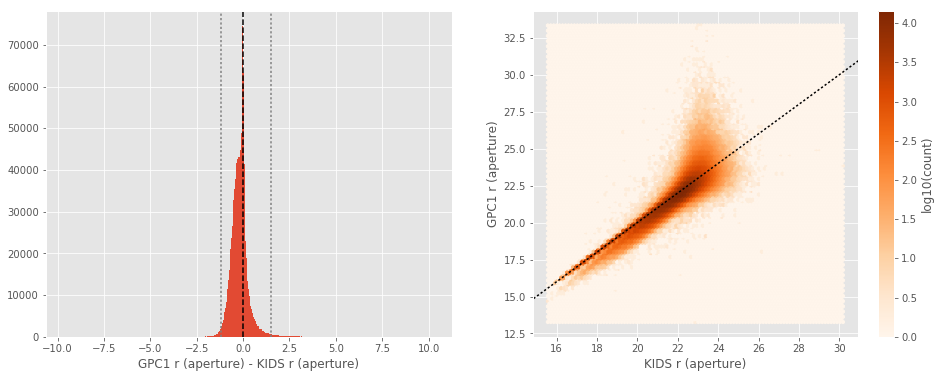

GPC1 r (total) - KIDS r (total):
- Median: 0.04
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8568764495849609
- 99% percentile: 0.7611067199706989


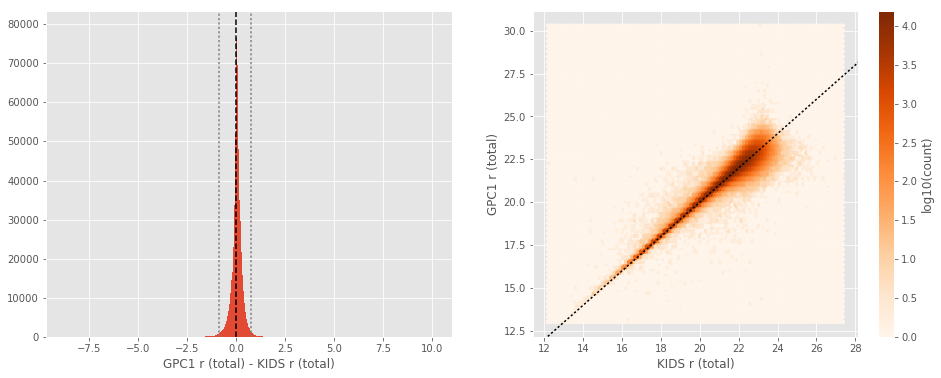

GPC1 r (aperture) - SUPRIME r (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.24
- 1% percentile: -1.3660277557373046
- 99% percentile: 1.5567139434814363


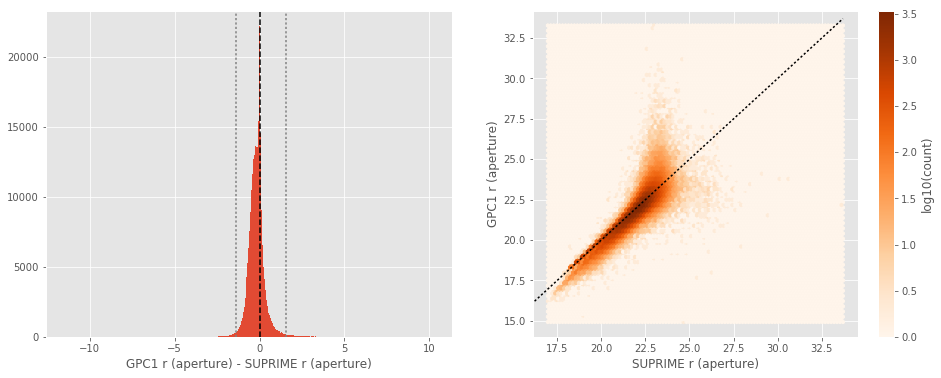

GPC1 r (total) - SUPRIME r (total):
- Median: 0.14
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8839898109436035
- 99% percentile: 0.8461173057556155


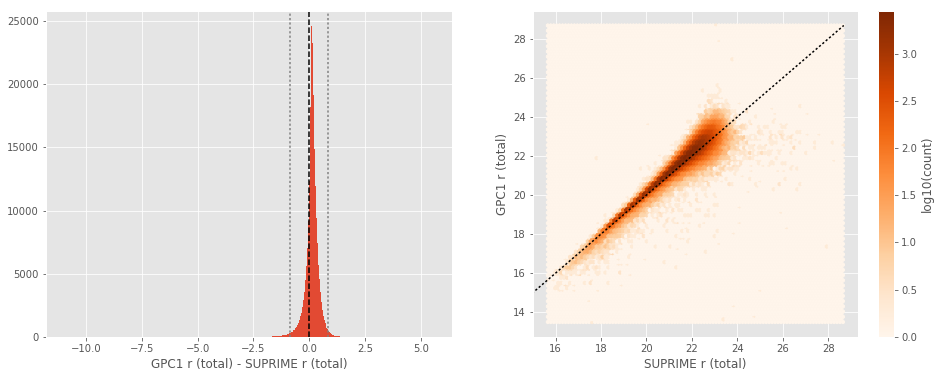

KIDS i (aperture) - DECam i (aperture):
- Median: -0.25
- Median Absolute Deviation: 0.33
- 1% percentile: -2.8722589111328123
- 99% percentile: 1.304483337402342


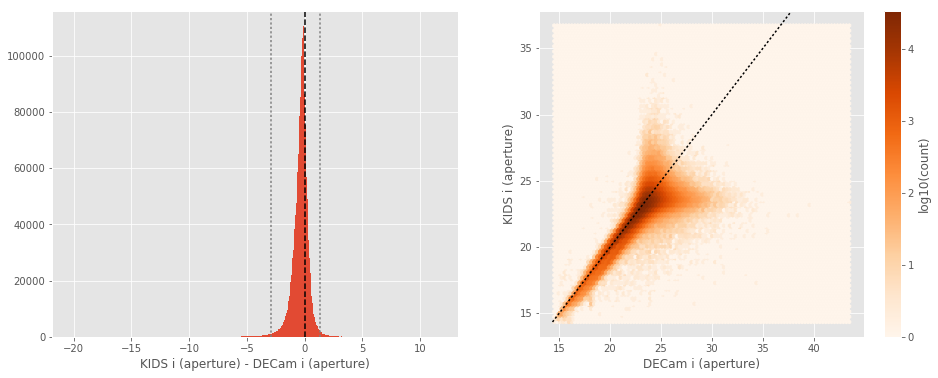

KIDS i (total) - DECam i (total):
- Median: -0.26
- Median Absolute Deviation: 0.33
- 1% percentile: -1.8559133911132812
- 99% percentile: 2.186717739105226


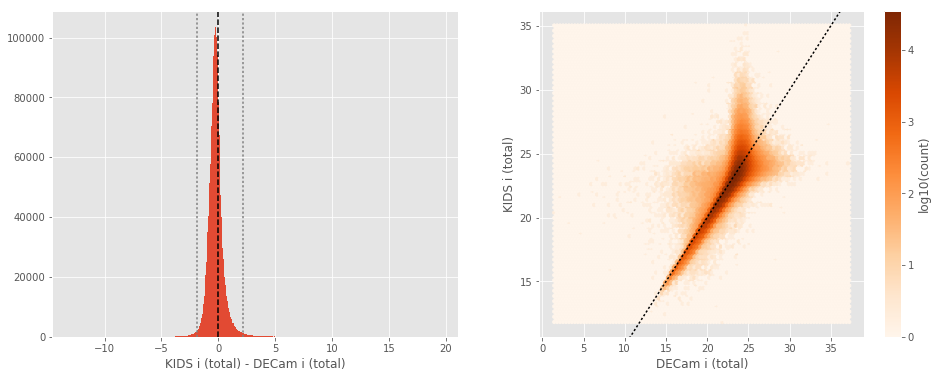

SUPRIME i (aperture) - DECam i (aperture):
- Median: -0.37
- Median Absolute Deviation: 0.34
- 1% percentile: -3.2666903495788575
- 99% percentile: 0.931794548034671


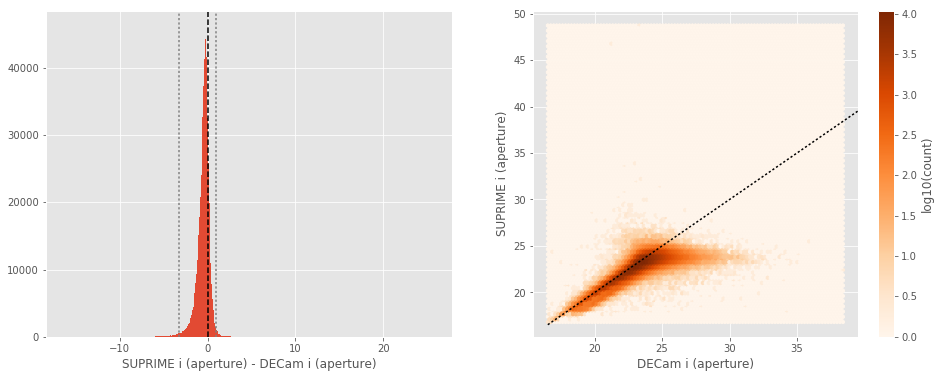

SUPRIME i (total) - DECam i (total):
- Median: -0.54
- Median Absolute Deviation: 0.31
- 1% percentile: -2.726251163482666
- 99% percentile: 1.2671364402771115


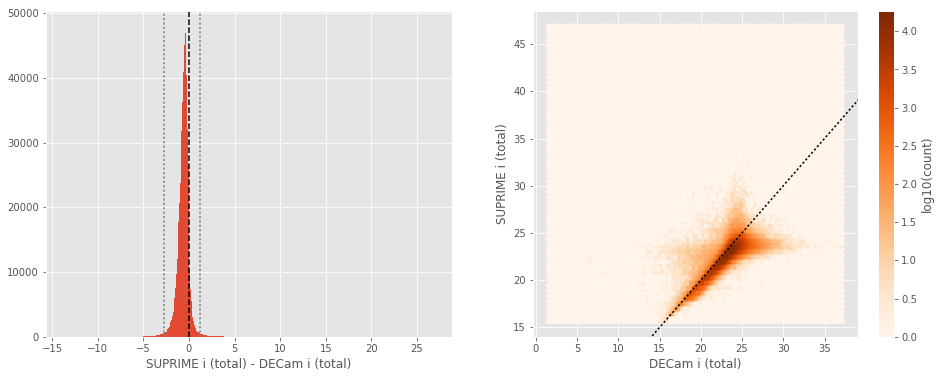

GPC1 i (aperture) - DECam i (aperture):
- Median: -0.46
- Median Absolute Deviation: 0.25
- 1% percentile: -2.445783233642578
- 99% percentile: 0.6057321166992189


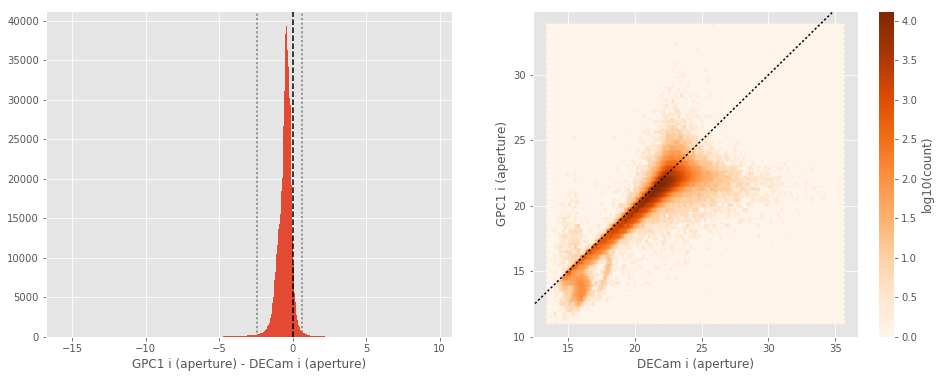

GPC1 i (total) - DECam i (total):
- Median: -0.29
- Median Absolute Deviation: 0.25
- 1% percentile: -1.6301992416381834
- 99% percentile: 0.7034828186035158


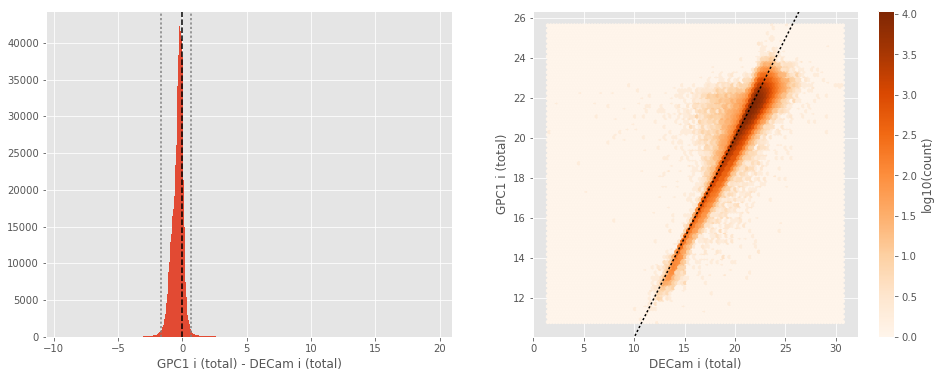

SUPRIME i (aperture) - KIDS i (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.21
- 1% percentile: -2.0993301010131837
- 99% percentile: 1.3187004470825237


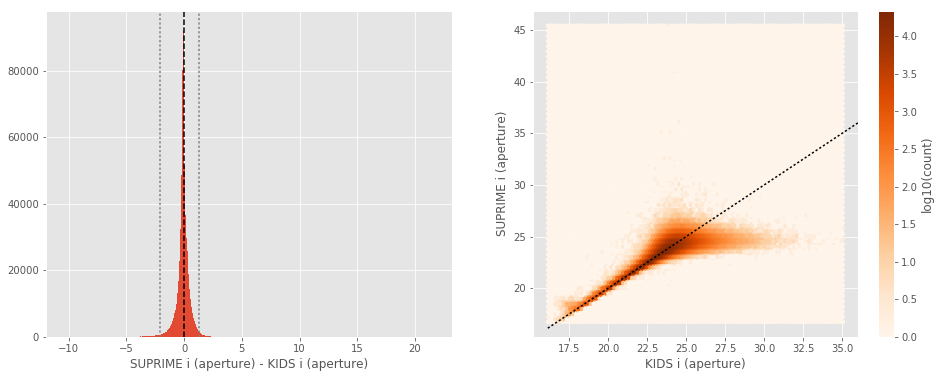

SUPRIME i (total) - KIDS i (total):
- Median: -0.30
- Median Absolute Deviation: 0.30
- 1% percentile: -3.1144363403320314
- 99% percentile: 1.3730266189575193


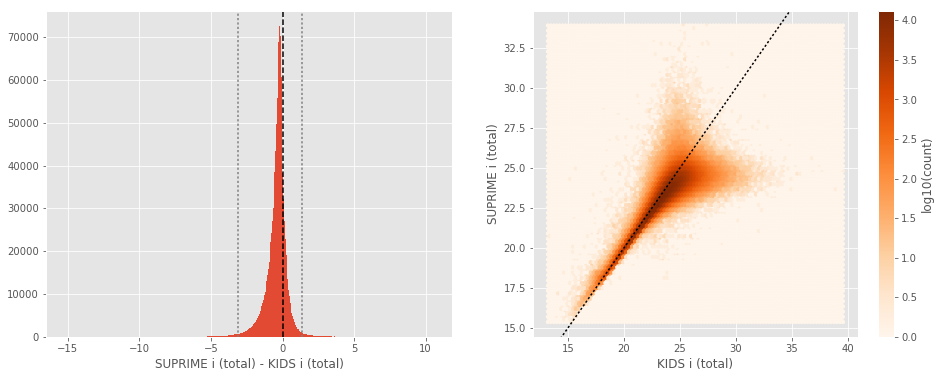

GPC1 i (aperture) - KIDS i (aperture):
- Median: -0.17
- Median Absolute Deviation: 0.20
- 1% percentile: -1.0249346923828124
- 99% percentile: 0.8876734161376945


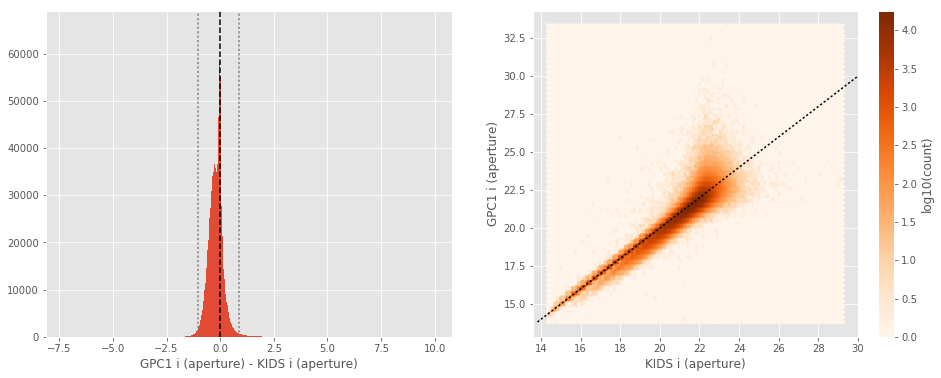

GPC1 i (total) - KIDS i (total):
- Median: 0.03
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8408512878417969
- 99% percentile: 0.7019467926025378


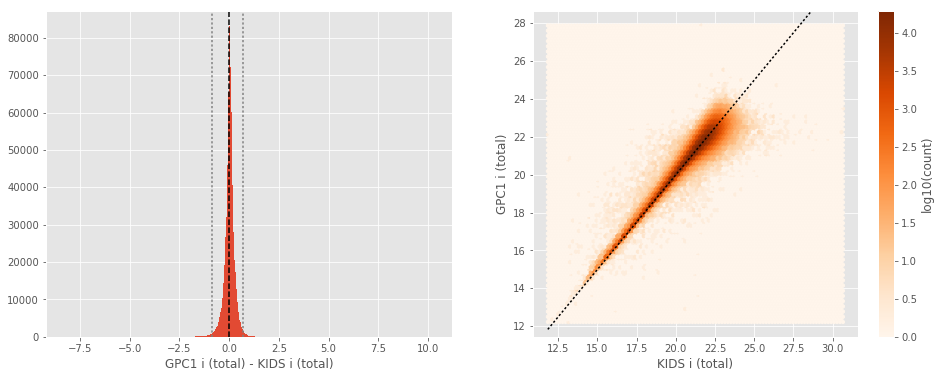

GPC1 i (aperture) - SUPRIME i (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.20
- 1% percentile: -1.1620124816894533
- 99% percentile: 0.9892982482910151


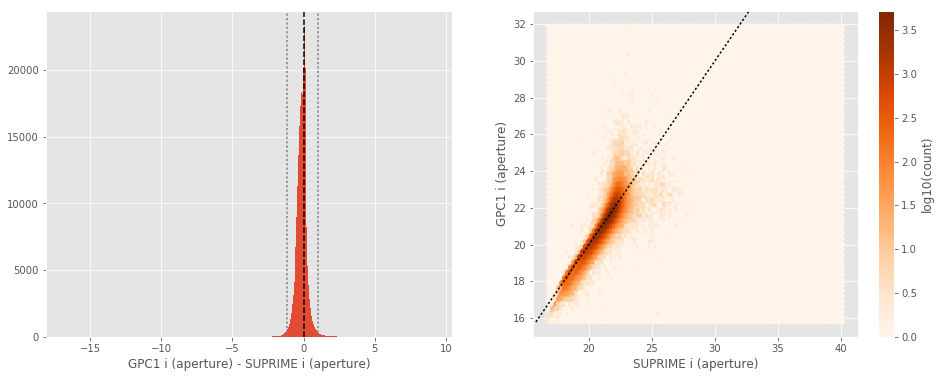

GPC1 i (total) - SUPRIME i (total):
- Median: 0.19
- Median Absolute Deviation: 0.11
- 1% percentile: -0.7631856536865234
- 99% percentile: 0.8027851486206053


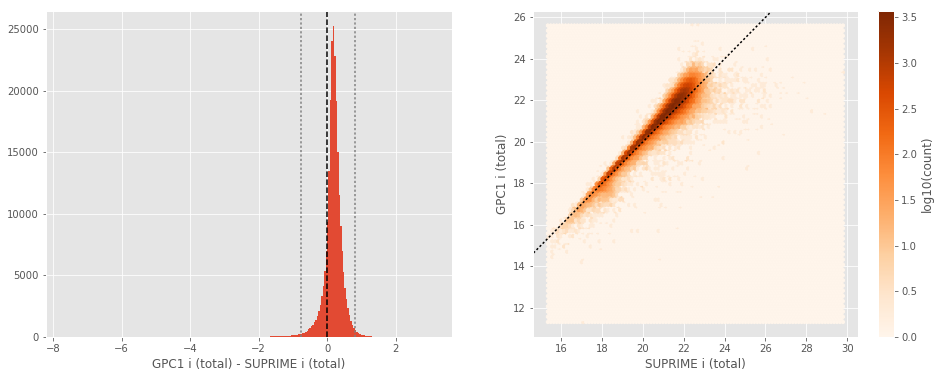

No sources have both DECam z (aperture) and SUPRIME z (aperture) values.
No sources have both DECam z (total) and SUPRIME z (total) values.
No sources have both DECam z (aperture) and GPC1 z (aperture) values.
No sources have both DECam z (total) and GPC1 z (total) values.
GPC1 z (aperture) - SUPRIME z (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.20
- 1% percentile: -1.0366680145263671
- 99% percentile: 1.1790359497070313


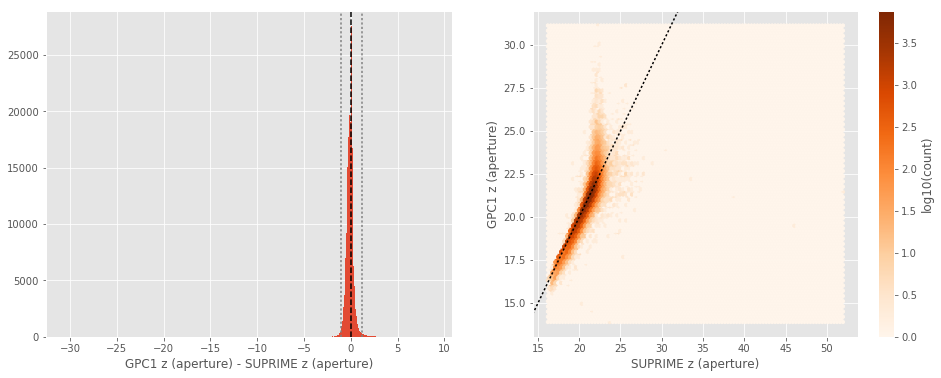

GPC1 z (total) - SUPRIME z (total):
- Median: 0.18
- Median Absolute Deviation: 0.12
- 1% percentile: -0.6331187438964844
- 99% percentile: 0.8256746673583981


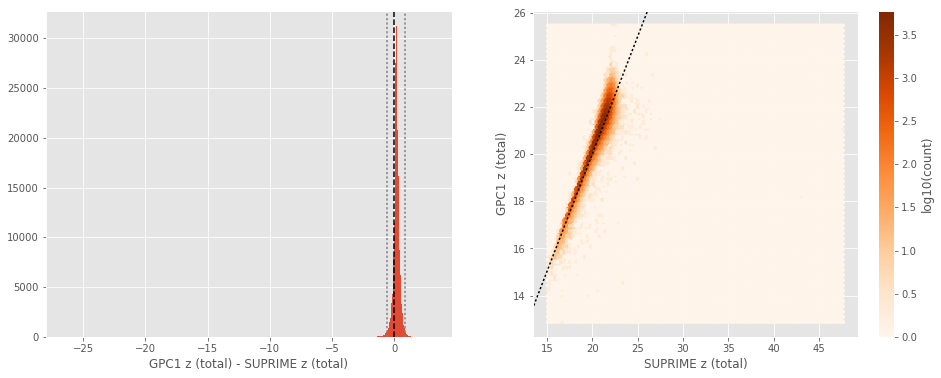

SUPRIME y (aperture) - DECam y (aperture):
- Median: -0.05
- Median Absolute Deviation: 0.20
- 1% percentile: -1.866614532470703
- 99% percentile: 1.233930130004885


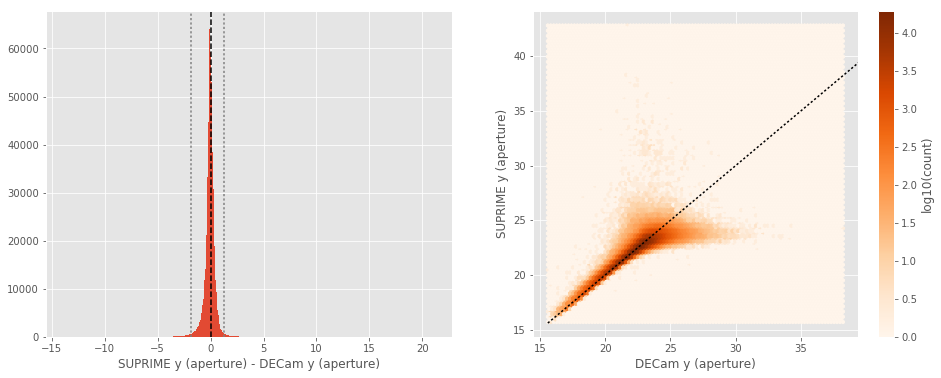

SUPRIME y (total) - DECam y (total):
- Median: -0.10
- Median Absolute Deviation: 0.16
- 1% percentile: -1.1705833435058595
- 99% percentile: 1.3771499633789048


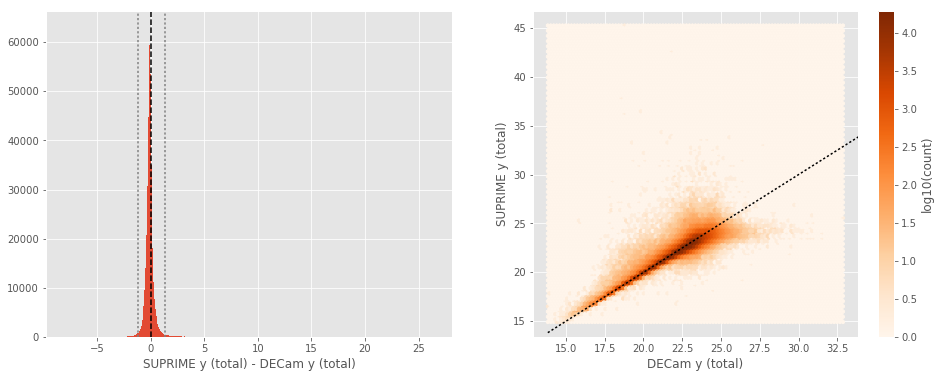

GPC1 y (aperture) - DECam y (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.18
- 1% percentile: -1.5973902893066405
- 99% percentile: 2.21849609375


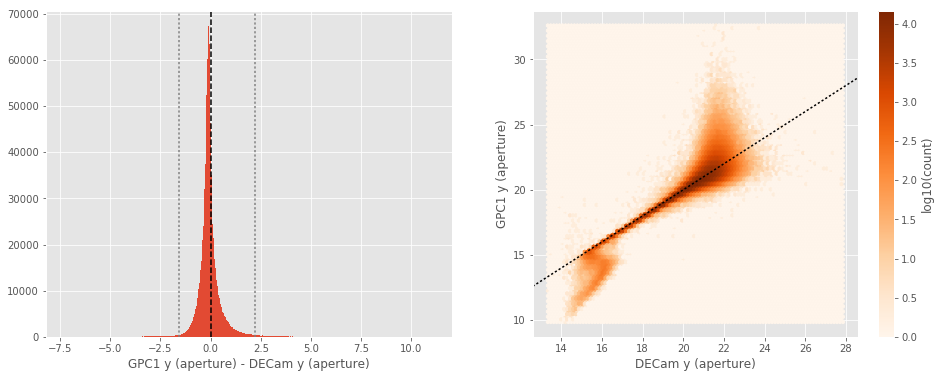

GPC1 y (total) - DECam y (total):
- Median: 0.13
- Median Absolute Deviation: 0.15
- 1% percentile: -0.8611082077026367
- 99% percentile: 1.1647806167602512


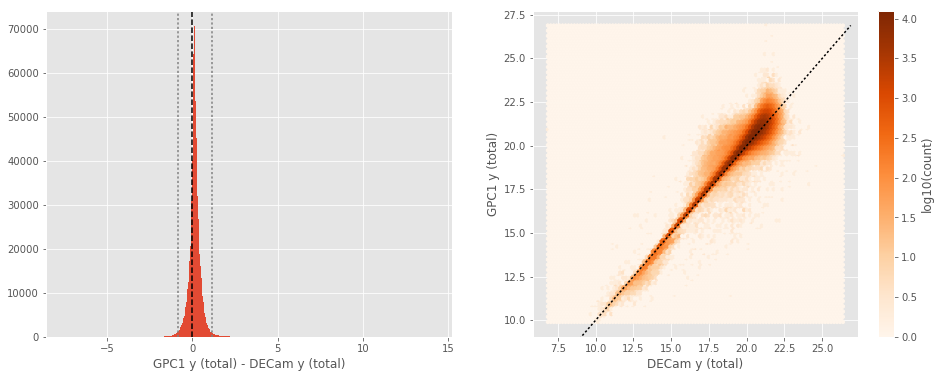

GPC1 y (aperture) - SUPRIME y (aperture):
- Median: -0.14
- Median Absolute Deviation: 0.28
- 1% percentile: -1.371766586303711
- 99% percentile: 2.32575355529785


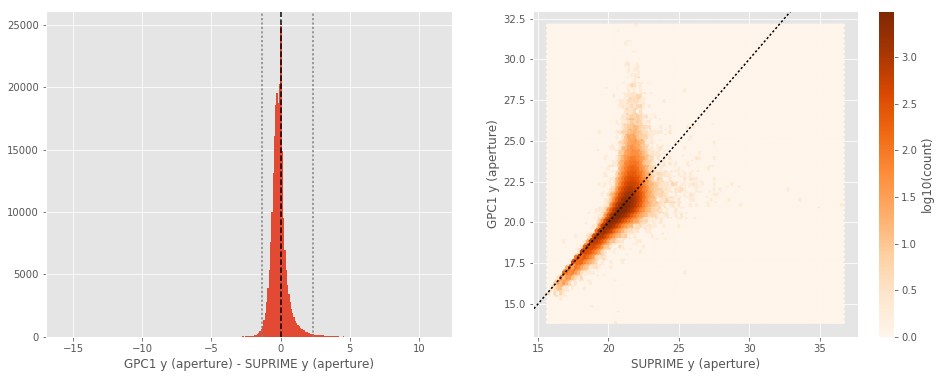

GPC1 y (total) - SUPRIME y (total):
- Median: 0.17
- Median Absolute Deviation: 0.16
- 1% percentile: -0.8742595672607422
- 99% percentile: 0.9855241775512698


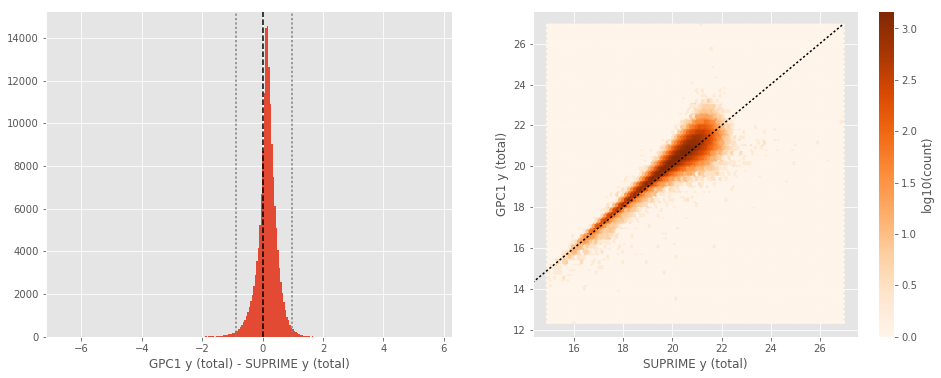

In [11]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [12]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [13]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_GAMA-12.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

KIDS u (aperture) - SDSS u (fiberMag):
- Median: 0.10
- Median Absolute Deviation: 0.42
- 1% percentile: -1.6068734741210937
- 99% percentile: 2.954749107360839


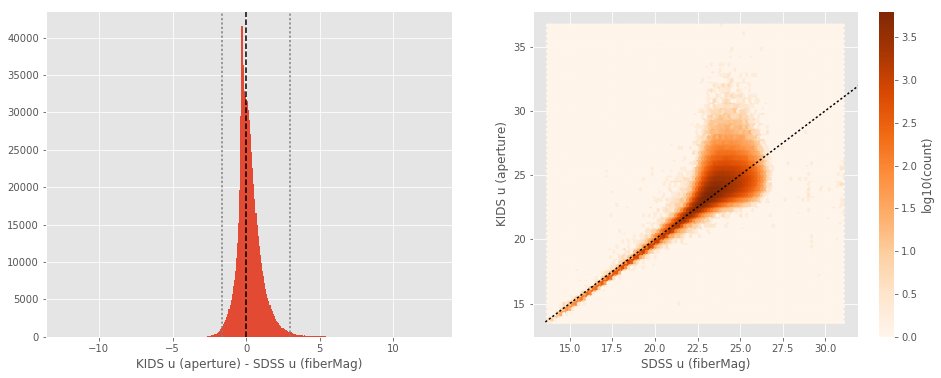

KIDS u (total) - SDSS u (petroMag):
- Median: 0.10
- Median Absolute Deviation: 0.42
- 1% percentile: -1.6068734741210937
- 99% percentile: 2.954749107360839


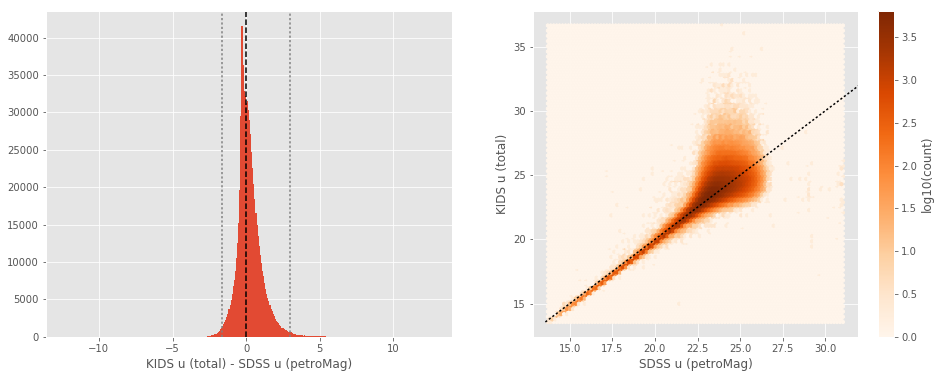

No sources have both SDSS g (fiberMag) and DECam g (aperture) values.
No sources have both SDSS g (petroMag) and DECam g (total) values.
KIDS g (aperture) - SDSS g (fiberMag):
- Median: -0.17
- Median Absolute Deviation: 0.16
- 1% percentile: -0.9890386962890625
- 99% percentile: 1.0339902496337894


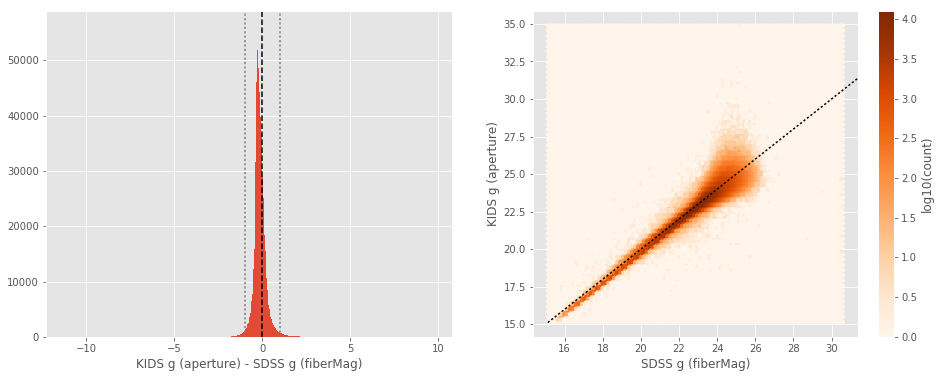

KIDS g (total) - SDSS g (petroMag):
- Median: -0.17
- Median Absolute Deviation: 0.16
- 1% percentile: -0.9890386962890625
- 99% percentile: 1.0339902496337894


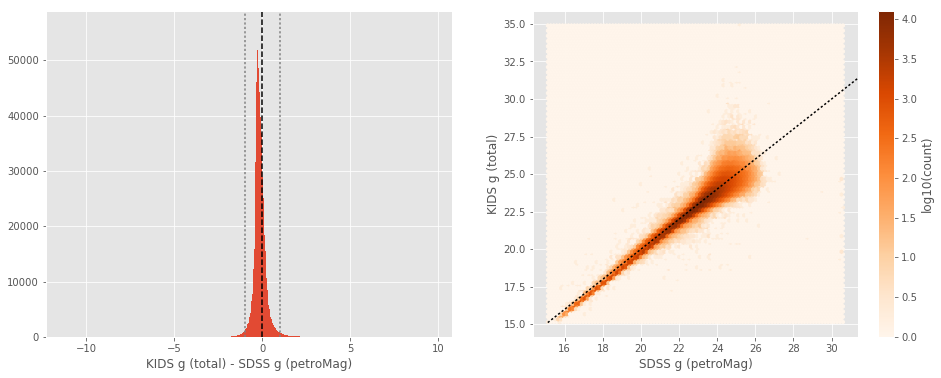

SUPRIME g (aperture) - SDSS g (fiberMag):
- Median: -0.27
- Median Absolute Deviation: 0.17
- 1% percentile: -1.1210815048217775
- 99% percentile: 1.0015515518188485


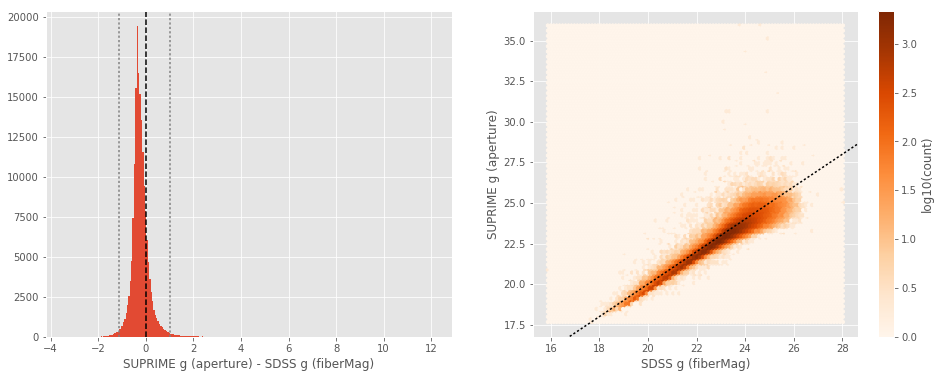

SUPRIME g (total) - SDSS g (petroMag):
- Median: -0.27
- Median Absolute Deviation: 0.17
- 1% percentile: -1.1210815048217775
- 99% percentile: 1.0015515518188485


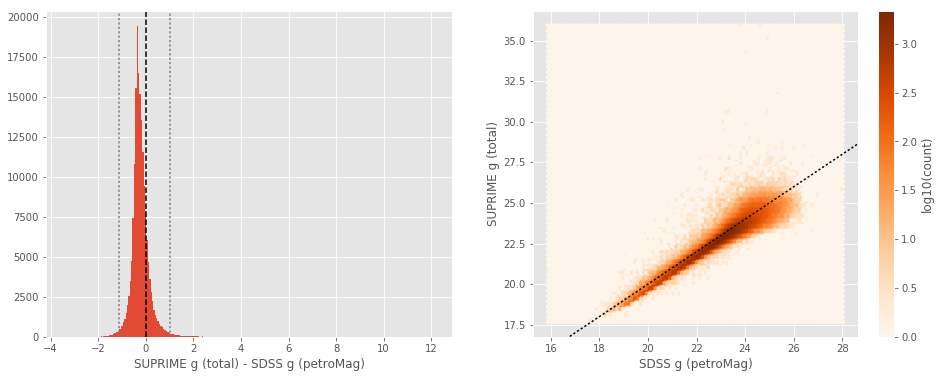

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.52
- Median Absolute Deviation: 0.26
- 1% percentile: -1.8783206939697266
- 99% percentile: 1.920540351867659


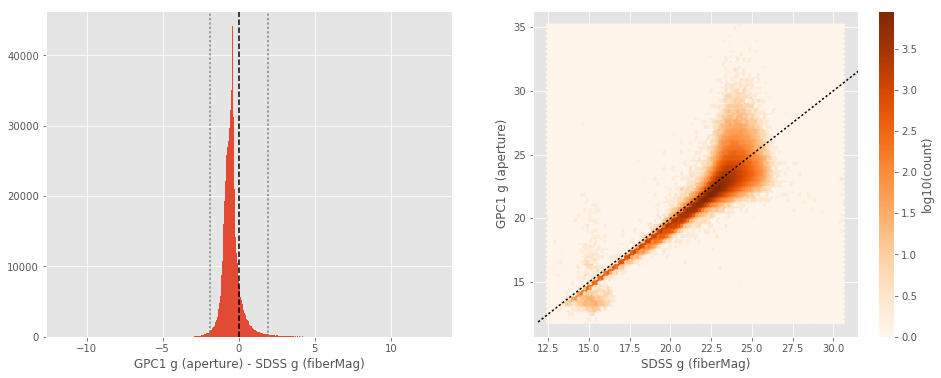

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.52
- Median Absolute Deviation: 0.26
- 1% percentile: -1.8783206939697266
- 99% percentile: 1.920540351867659


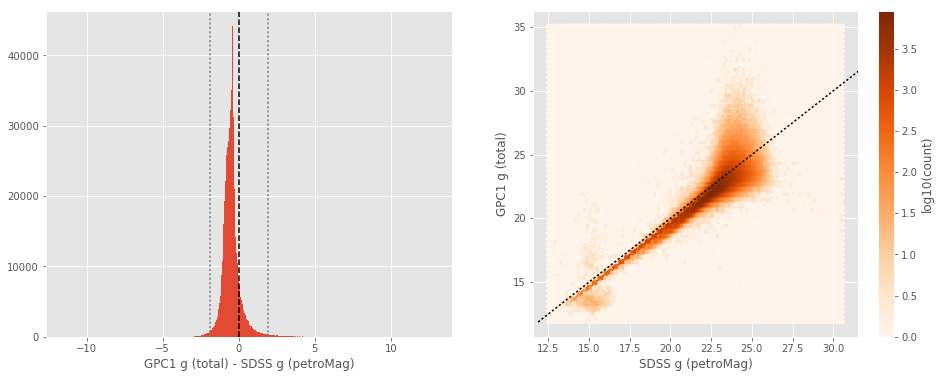

DECam r (aperture) - SDSS r (fiberMag):
- Median: 0.52
- Median Absolute Deviation: 0.36
- 1% percentile: -0.49354766845703124
- 99% percentile: 2.732038574218751


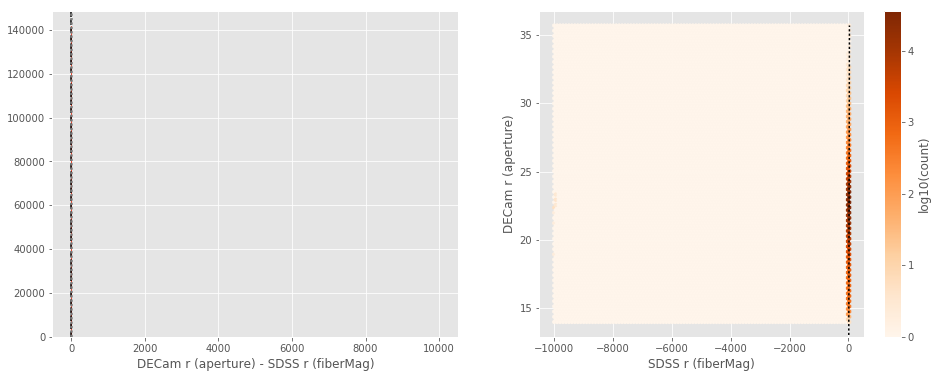

DECam r (total) - SDSS r (petroMag):
- Median: 0.52
- Median Absolute Deviation: 0.36
- 1% percentile: -0.49354766845703124
- 99% percentile: 2.732038574218751


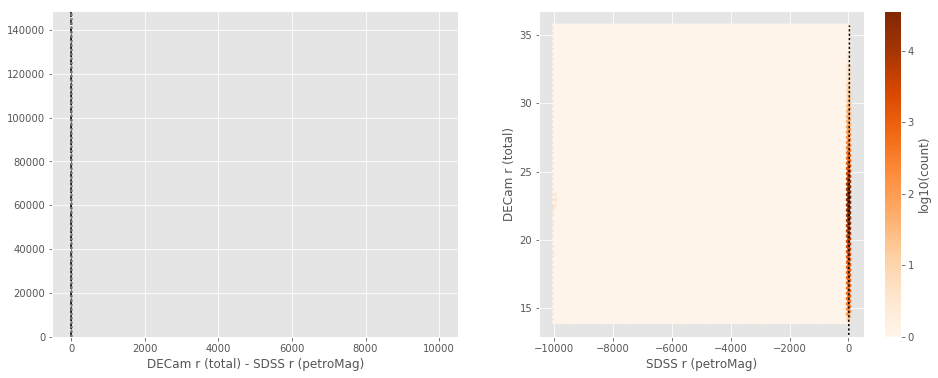

KIDS r (aperture) - SDSS r (fiberMag):
- Median: -0.23
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8954749298095703
- 99% percentile: 0.4217640686035158


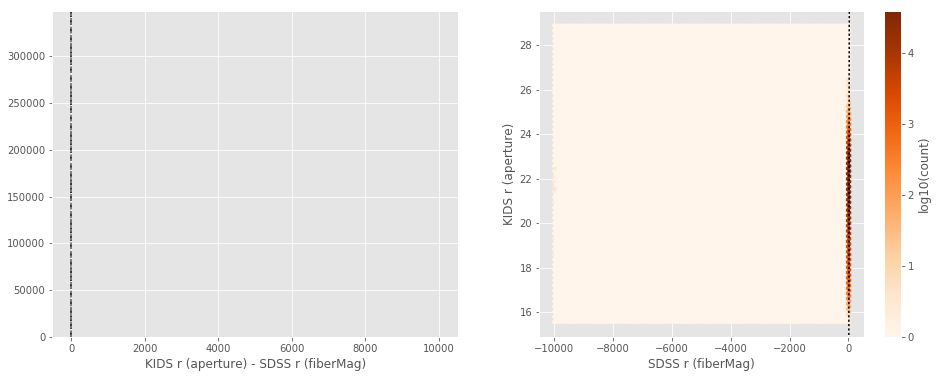

KIDS r (total) - SDSS r (petroMag):
- Median: -0.23
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8954749298095703
- 99% percentile: 0.4217640686035158


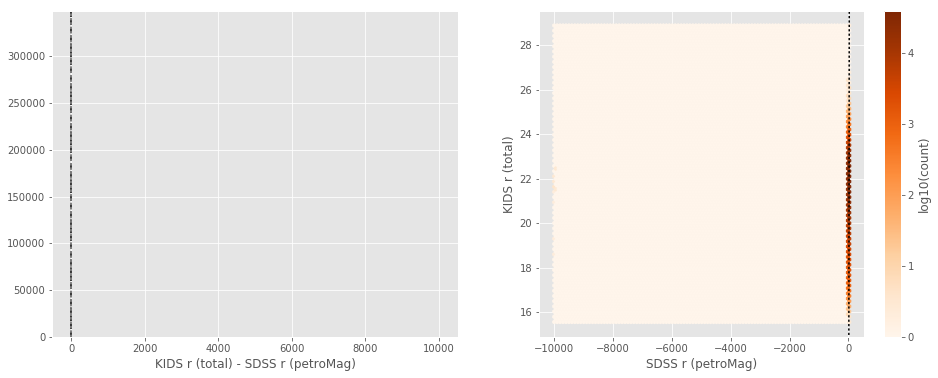

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.26
- Median Absolute Deviation: 0.12
- 1% percentile: -0.951361083984375
- 99% percentile: 0.6180745697021484


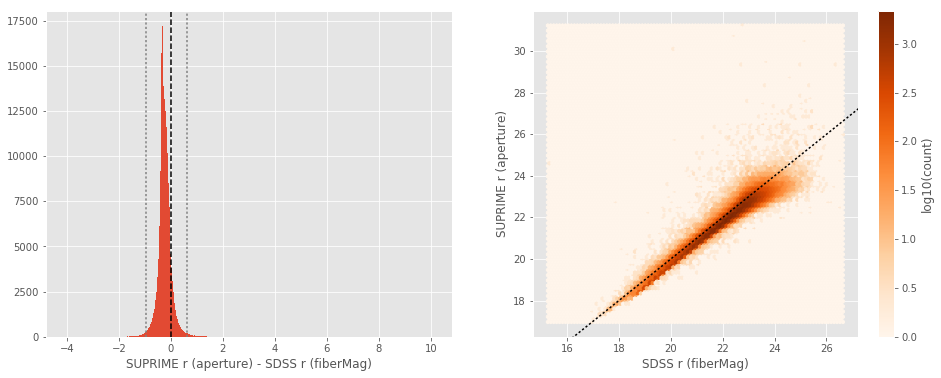

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.26
- Median Absolute Deviation: 0.12
- 1% percentile: -0.951361083984375
- 99% percentile: 0.6180745697021484


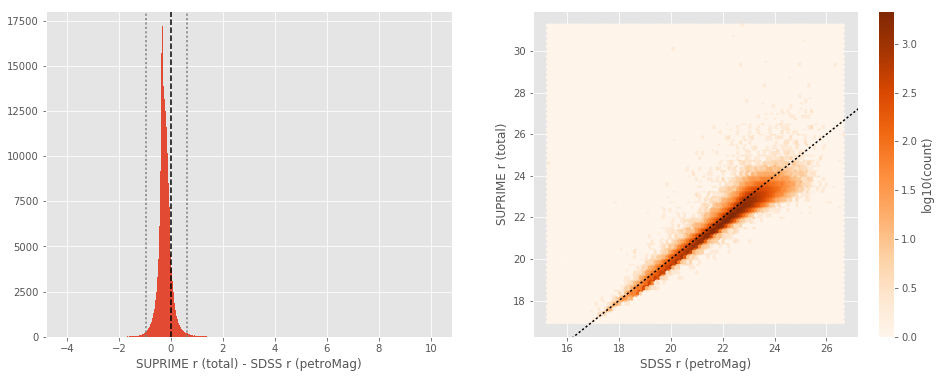

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.16
- 1% percentile: -1.291998748779297
- 99% percentile: 0.9754924011230486


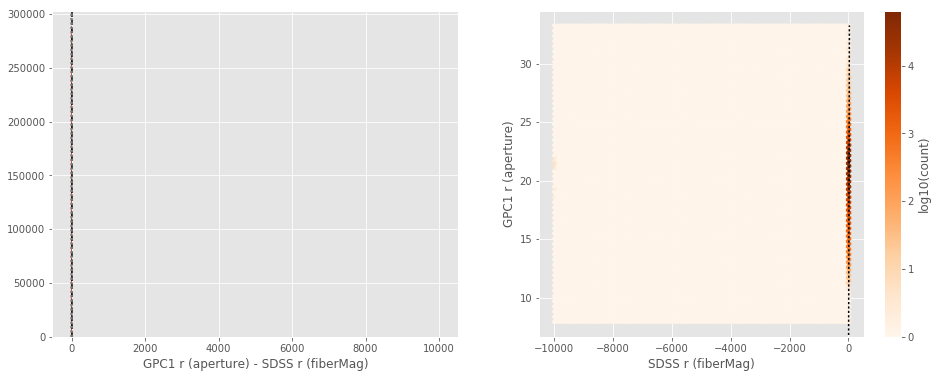

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.43
- Median Absolute Deviation: 0.16
- 1% percentile: -1.291998748779297
- 99% percentile: 0.9754924011230486


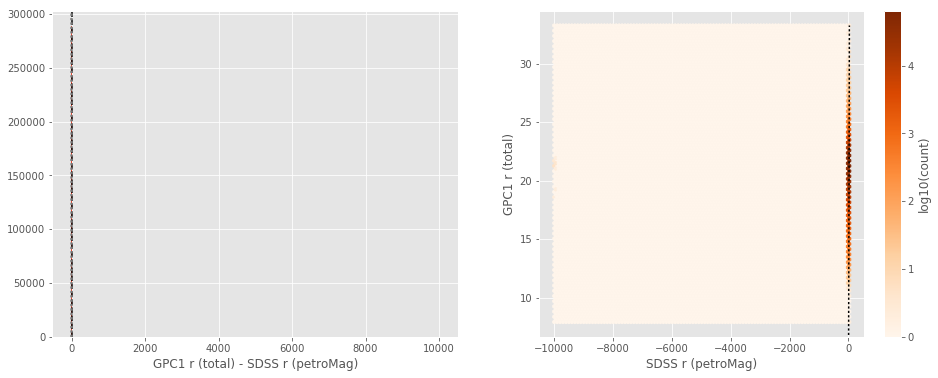

DECam i (aperture) - SDSS i (fiberMag):
- Median: -0.03
- Median Absolute Deviation: 0.21
- 1% percentile: -0.7520022773742676
- 99% percentile: 1.7319891357421873


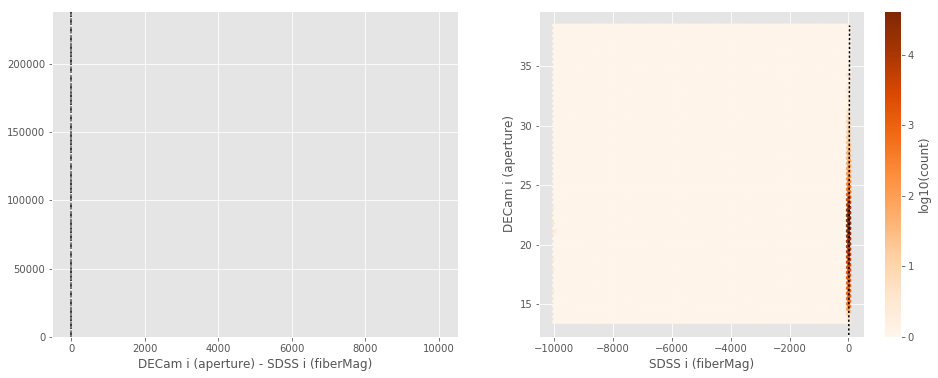

DECam i (total) - SDSS i (petroMag):
- Median: -0.03
- Median Absolute Deviation: 0.21
- 1% percentile: -0.7520022773742676
- 99% percentile: 1.7319891357421873


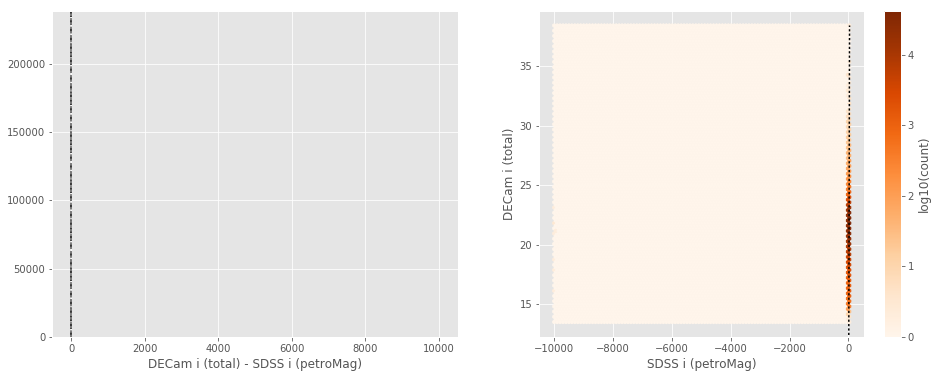

KIDS i (aperture) - SDSS i (fiberMag):
- Median: -0.22
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8867145347595214
- 99% percentile: 0.4907330894470201


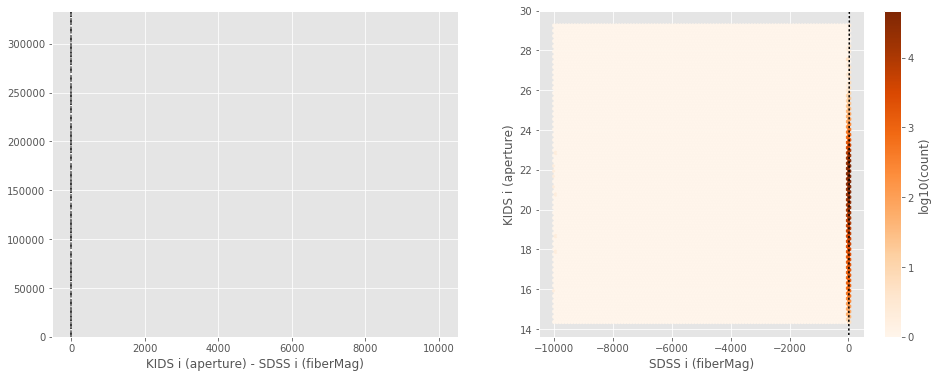

KIDS i (total) - SDSS i (petroMag):
- Median: -0.22
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8867145347595214
- 99% percentile: 0.4907330894470201


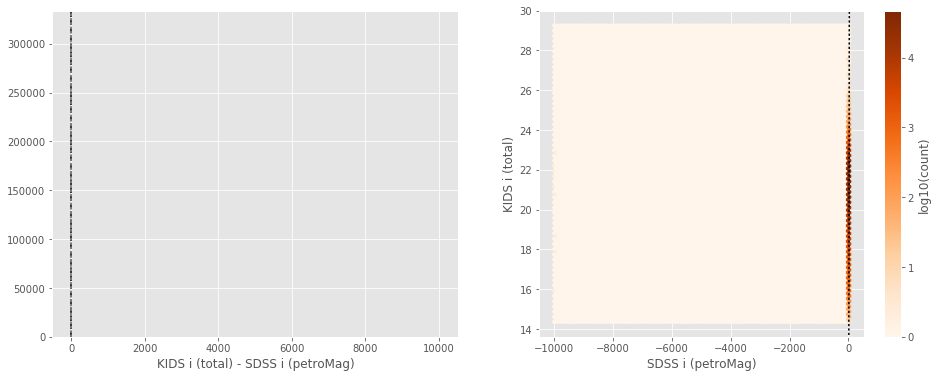

SUPRIME i (aperture) - SDSS i (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9200366592407226
- 99% percentile: 0.5815175437927244


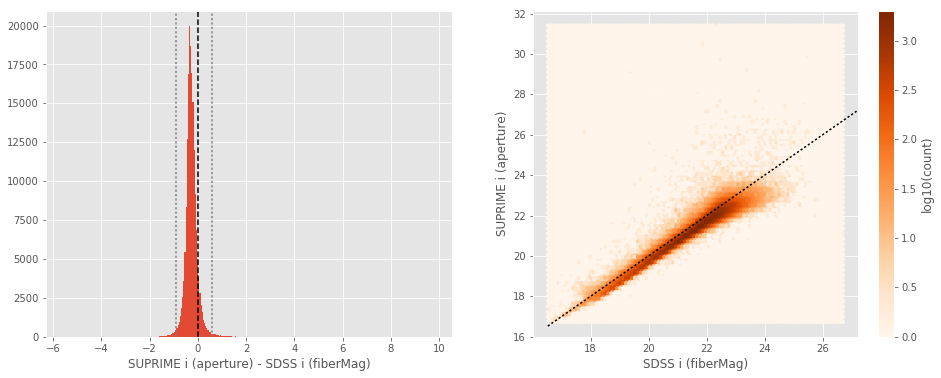

SUPRIME i (total) - SDSS i (petroMag):
- Median: -0.29
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9200366592407226
- 99% percentile: 0.5815175437927244


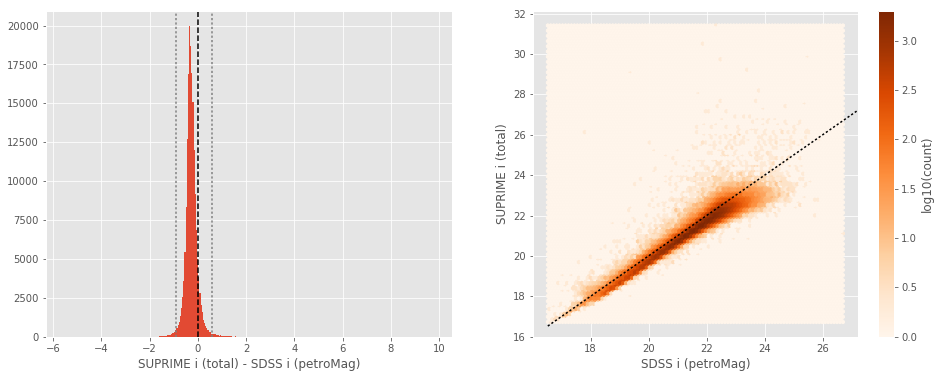

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.42
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0596820831298828
- 99% percentile: 0.5549477386474635


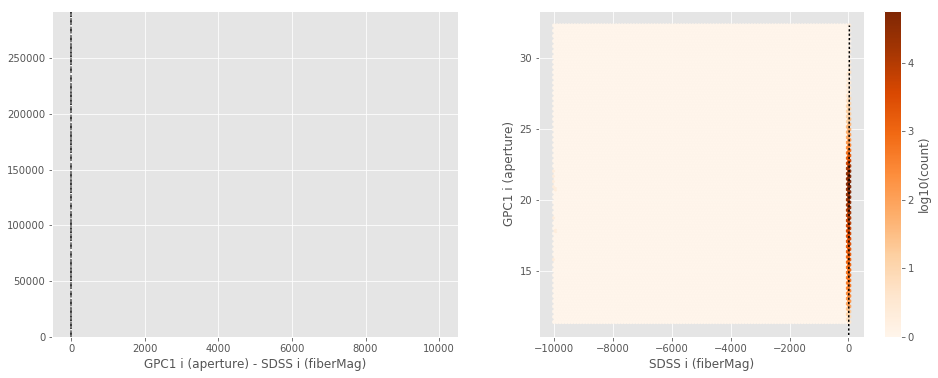

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.42
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0596820831298828
- 99% percentile: 0.5549477386474635


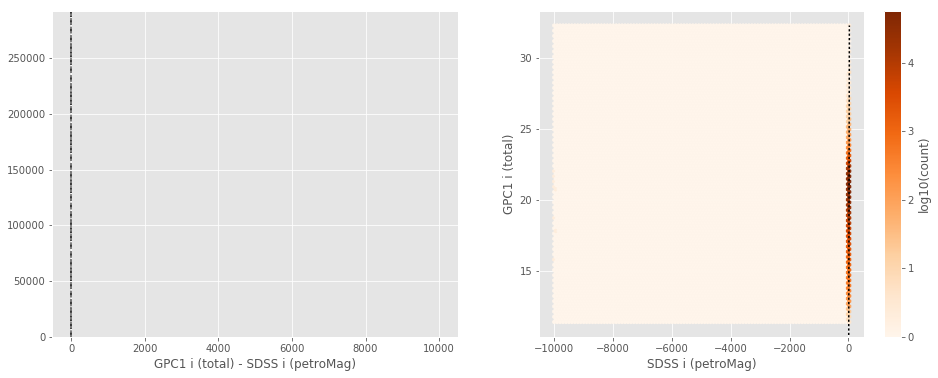

No sources have both SDSS z (fiberMag) and DECam z (aperture) values.
No sources have both SDSS z (petroMag) and DECam z (total) values.
SUPRIME z (aperture) - SDSS z (fiberMag):
- Median: -0.17
- Median Absolute Deviation: 0.19
- 1% percentile: -1.1571583557128906
- 99% percentile: 1.0003077316284184


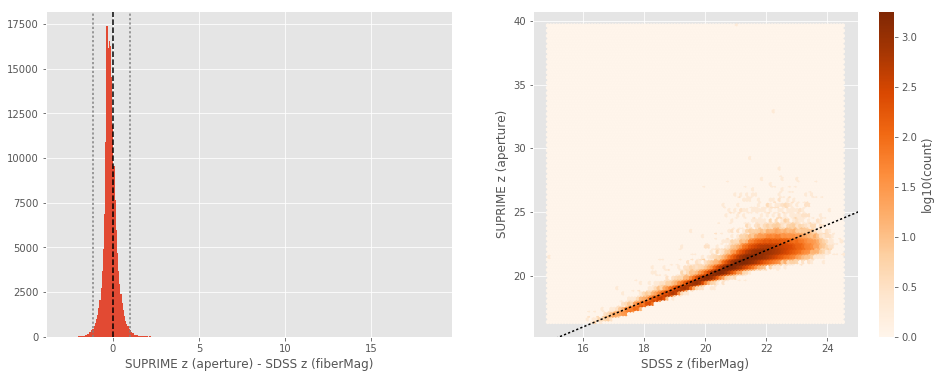

SUPRIME z (total) - SDSS z (petroMag):
- Median: -0.17
- Median Absolute Deviation: 0.19
- 1% percentile: -1.1571583557128906
- 99% percentile: 1.0003077316284184


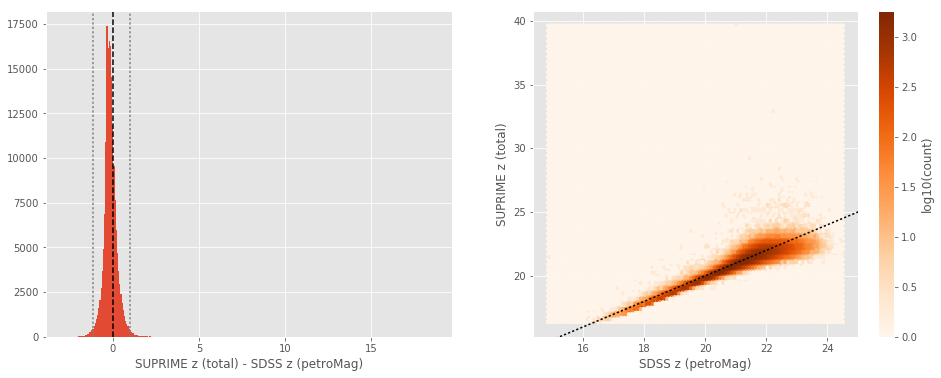

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.18
- 1% percentile: -1.2993665313720701
- 99% percentile: 1.0381328201293956


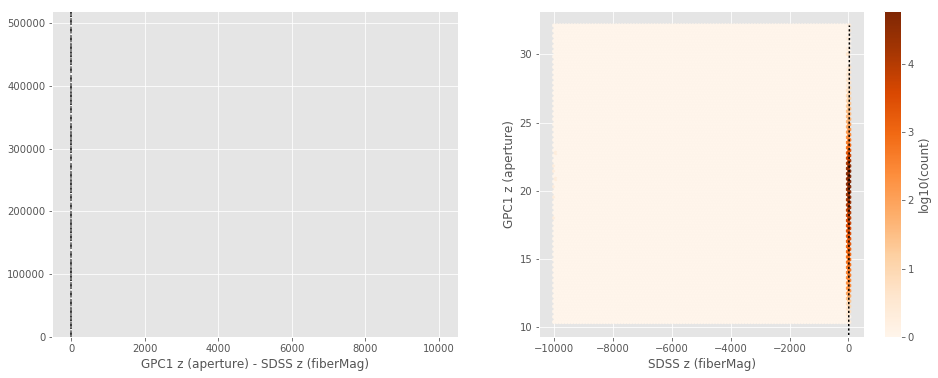

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.31
- Median Absolute Deviation: 0.18
- 1% percentile: -1.2993665313720701
- 99% percentile: 1.0381328201293956


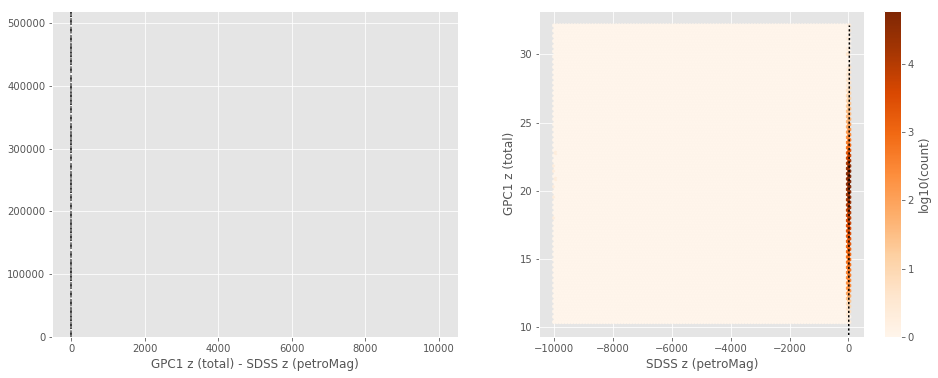

In [14]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [15]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [16]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_GAMA-12.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: 0.06
- Median Absolute Deviation: 0.06
- 1% percentile: -0.8233773828031368
- 99% percentile: 0.7282878625581957


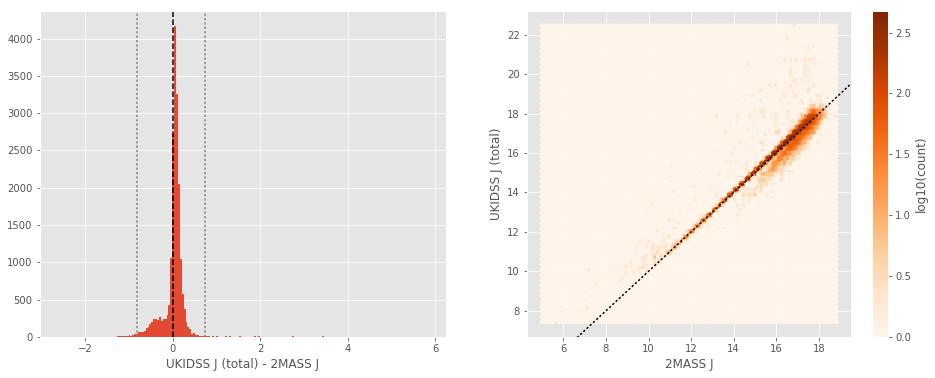

In [17]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_wfcam_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

UKIDSS Ks-like (total) - 2MASS Ks:
- Median: 0.11
- Median Absolute Deviation: 0.10
- 1% percentile: -0.838410065751889
- 99% percentile: 1.102716745084901


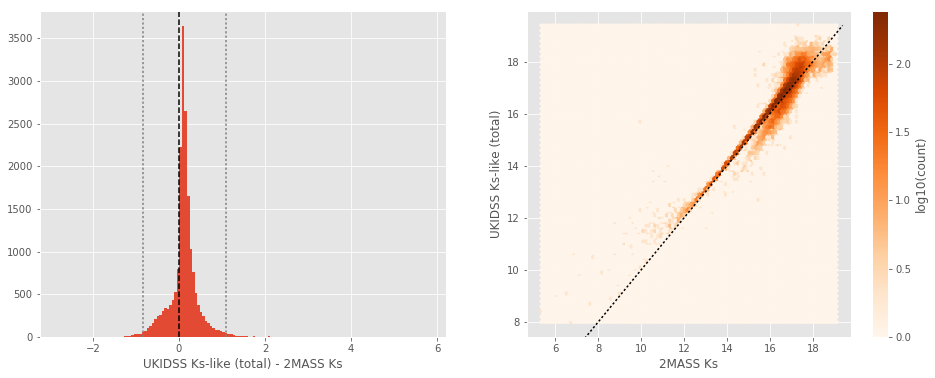

In [18]:
ukidss_ks_like = master_catalogue['m_wfcam_k'] + 0.003 + 0.004 * (
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

VISTA J (total) - 2MASS J:
- Median: 0.02
- Median Absolute Deviation: 0.08
- 1% percentile: -1.1603096778013053
- 99% percentile: 1.0473402899263549


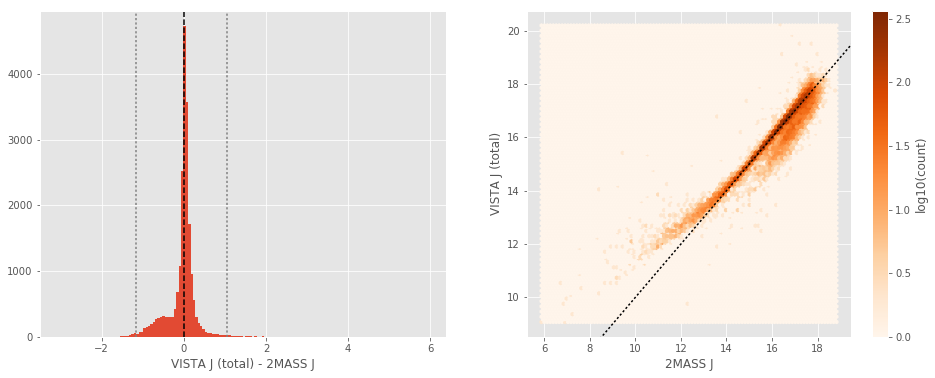

In [19]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vircam_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

VISTA Ks (total) - 2MASS Ks:
- Median: 0.05
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0731929440172698
- 99% percentile: 1.2191779905072637


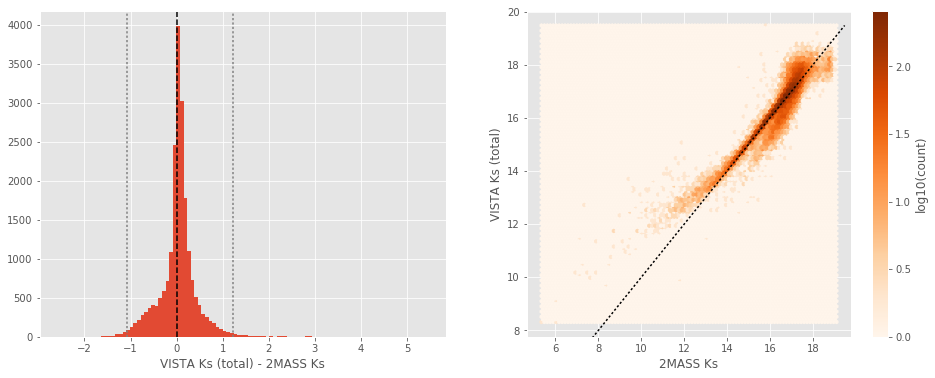

In [20]:
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, master_catalogue['m_vircam_k'][ml_twomass_idx],
                labels=("2MASS Ks", "VISTA Ks (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 4366603 / 12369251 (35.30%)


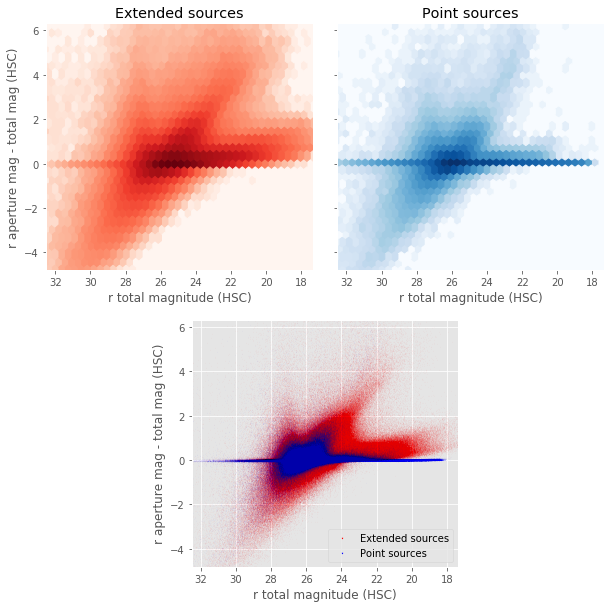

In [21]:
nb_ccplots(
    master_catalogue['m_suprime_r'],
    master_catalogue['m_ap_suprime_r'] - master_catalogue['m_suprime_r'],
    "r total magnitude (HSC)", "r aperture mag - total mag (HSC)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 37754 / 12369251 (0.31%)


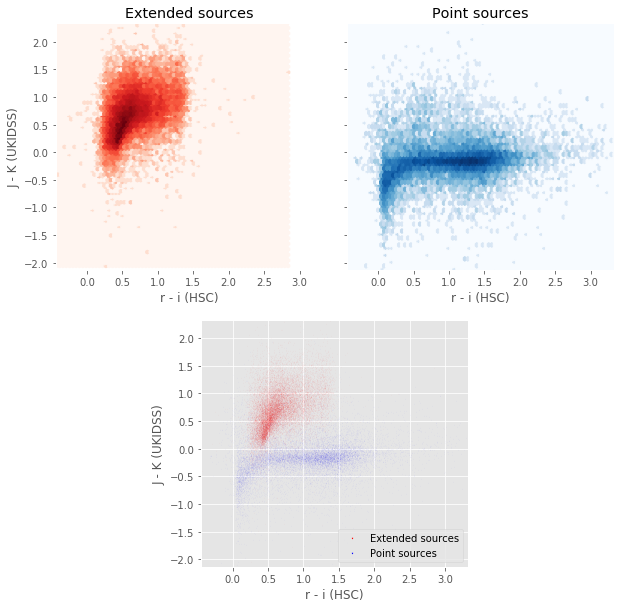

In [22]:
nb_ccplots(
    master_catalogue['m_suprime_r'] - master_catalogue['m_suprime_i'],
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    "r - i (HSC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 37754 / 12369251 (0.31%)


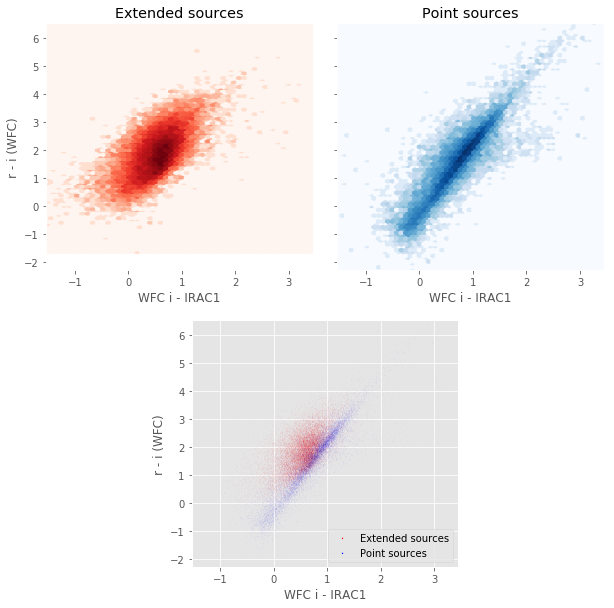

In [23]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_wfcam_j'],
    master_catalogue['m_suprime_r'] - master_catalogue['m_wfcam_k'],
    "WFC i - IRAC1", "r - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 37757 / 12369251 (0.31%)


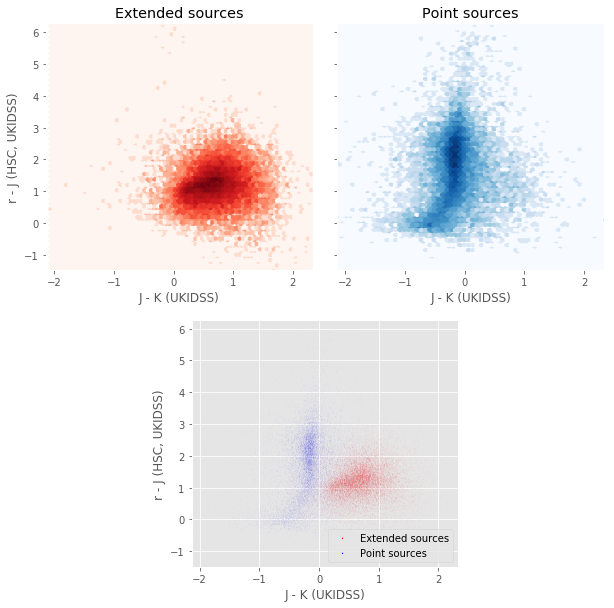

In [24]:
nb_ccplots(
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    master_catalogue['m_suprime_r'] - master_catalogue['m_wfcam_j'],
    "J - K (UKIDSS)", "r - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)

In [25]:
nb_ccplots(
    master_catalogue['m_decam_i'] - master_catalogue['m_decam_z'],
    master_catalogue['m_decam_z'] - master_catalogue['m_wfcam_j'],
    "i - z (DECaLS)", "z - J (DECaLS, UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 12369251 (0.00%)
HELP warning: no sources with observations in both bands
